### Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset

In [3]:
path=r'C:\Users\Ravi\OneDrive\Desktop\edtech\Module-9(Python)\Projects\Batch\src\Libraries\Pandas\electronics.csv'
dataset = pd.read_csv(path)
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


#### explore data

In [4]:
dataset.shape

(1292954, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [6]:
from datetime import datetime
pd.to_datetime(dataset['timestamp'])
dataset['brand'] = dataset['brand'].astype(str)
dataset['category'] = dataset['category'].astype(str)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)


In [7]:
dataset.describe()

,rating,timestamp,year,split
count,1.292954e+06,1292954,1.292954e+06,1.292954e+06
mean,4.051482e+00,2015-06-18 11:30:34.851355904,2.012938e+03,1.747587e-01
min,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2014-09-06 00:00:00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2015-10-19 00:00:00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2016-10-19 00:00:00,2.015000e+03,0.000000e+00
max,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00
std,1.379732e+00,NaN,2.643513e+00,5.506810e-01


In [8]:
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [9]:
dataset.duplicated().sum()

np.int64(0)

In [10]:
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [11]:
dataset['rating'].value_counts()
# dataset['user_attr'].value_counts()
# dataset['split'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [12]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year
dataset['year'].value_counts()

year
2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: count, dtype: int64

In [13]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month
dataset['month'].value_counts()

month
1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: count, dtype: int64

In [14]:
# dataset.dropna(inplace=True)
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
month               0
dtype: int64

#### make plots

<Axes: xlabel='rating', ylabel='count'>

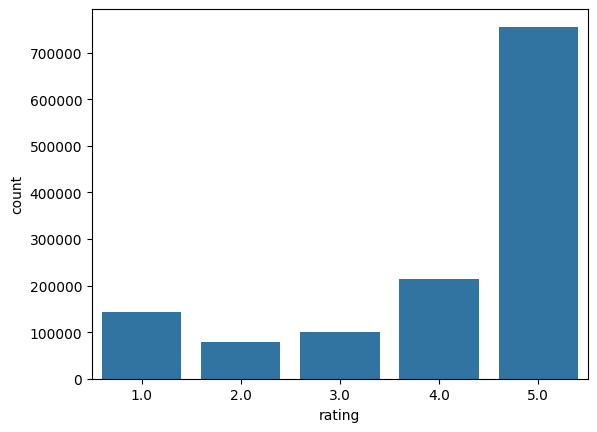

In [15]:
sns.countplot(x='rating', data=dataset)

In [16]:
datatset_filtered=dataset[dataset["year"]>2015]

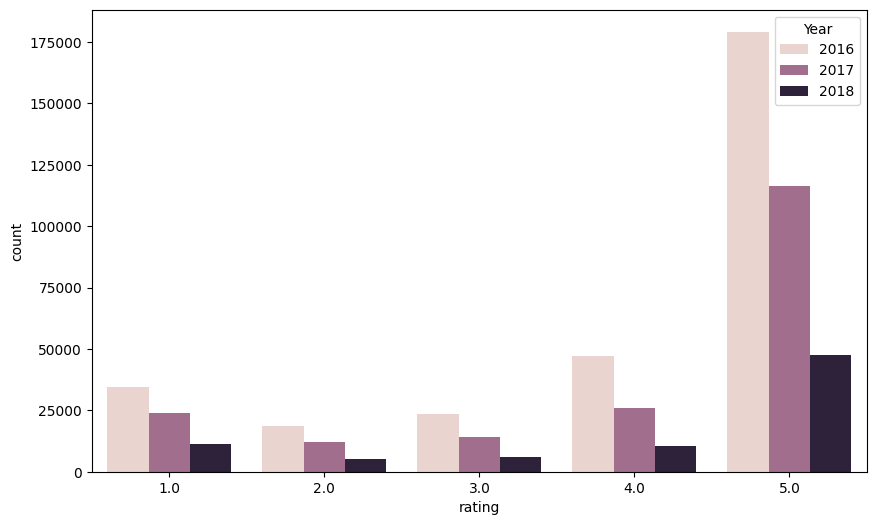

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='year', data=datatset_filtered)
plt.legend(title='Year')  # Optional: adds a title to the legend
plt.show()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_18412\2375979781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=dataset, palette='viridis')


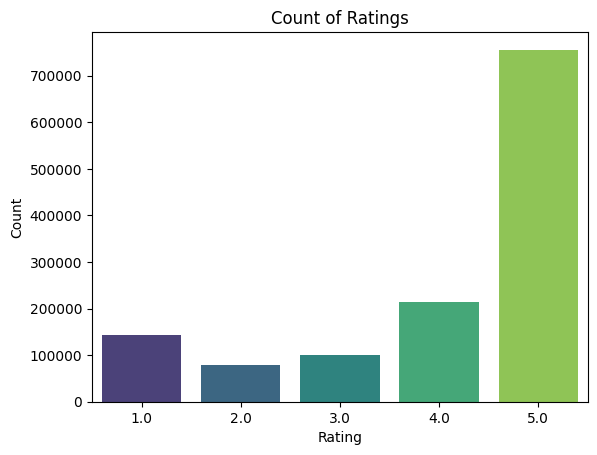

In [18]:
sns.countplot(x='rating', data=dataset, palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [19]:
dataset['rating'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

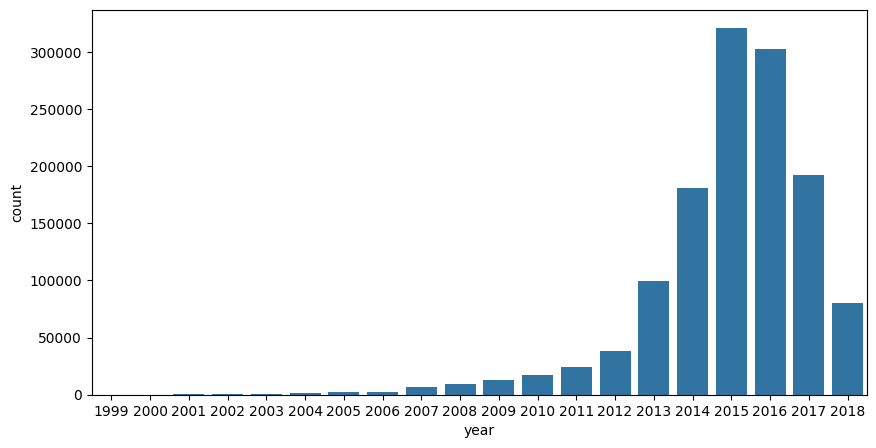

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=dataset)
plt.show()

<Axes: xlabel='brand', ylabel='count'>

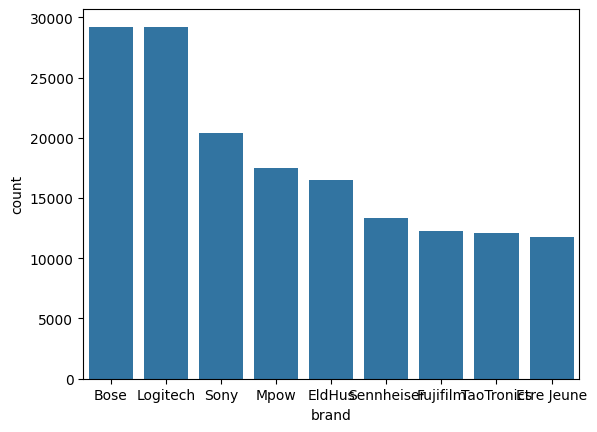

In [21]:
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)

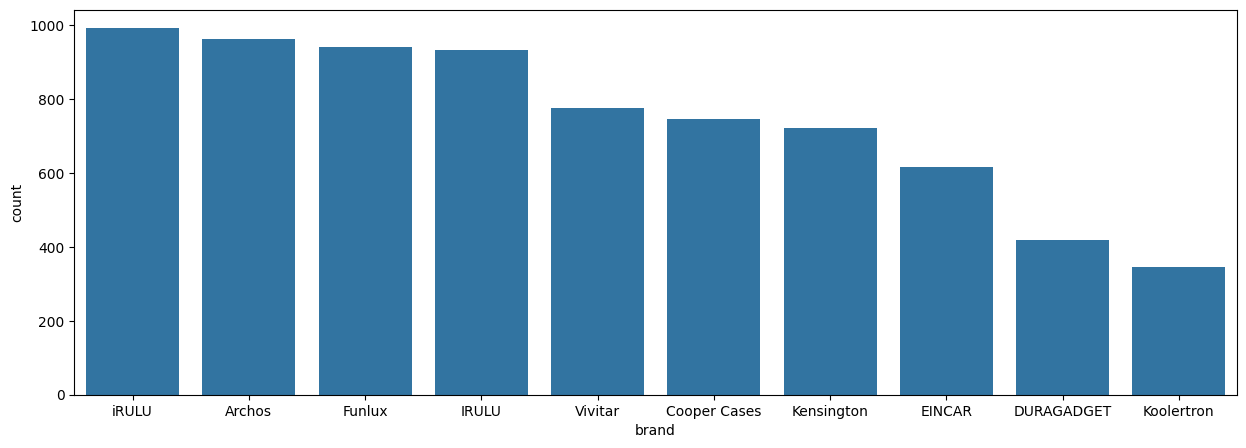

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)
plt.show()

<Axes: xlabel='brand', ylabel='count'>

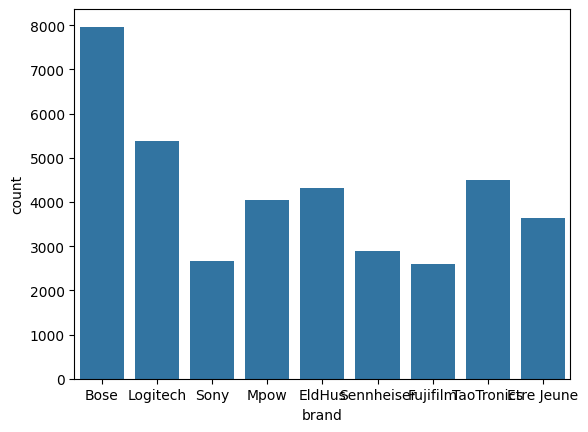

In [23]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

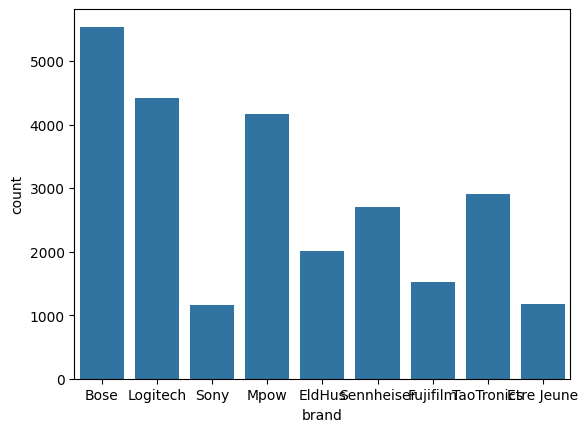

In [24]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)

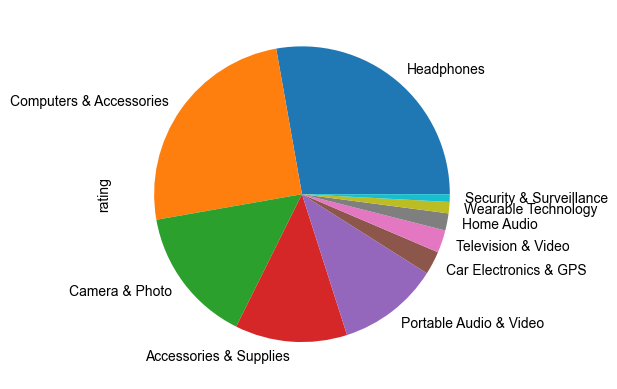

In [25]:
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')
sns.set_style('white')